# Tiesinė regresija užduotis

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
fish = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/Fish.csv')

In [5]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Užduotis
Turime lentelę su 7 žuvų rūšim, bei įvairiais jų išmatavimais. Vienas iš jų yra svoris - tai bus mūsų *target* stulpelis. **Sukurkite tiesinės regresijos modelį, kuris pagal kitus lentelės stulpelius spėlios žuvies svorį.** Išsiaiškinkite, ar yra trūkstamų reikšmių, atsispausdinkite keletą diagramų ir histogramų, patyrinėkite tendencijas ir koreliacijas. Kilus neaiškumams, remkitės paskaitos medžiaga. Sėkmės!


In [6]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
sns.pairplot(fish, hue='Species')

In [7]:
dummies = pd.get_dummies(fish['Species'])

In [12]:
dummies.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [55]:
data = pd.concat([fish, dummies], axis=1)

In [64]:
data.tail(100)

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736,False,False,False,False,False,False,True
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250,False,False,False,False,False,False,True
61,Parkki,55.0,13.5,14.7,16.5,6.8475,2.3265,False,True,False,False,False,False,False
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142,False,True,False,False,False,False,False
63,Parkki,90.0,16.3,17.7,19.8,7.4052,2.6730,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


In [65]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='object')

In [67]:
X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']]

In [66]:
y = data['Weight']

In [68]:
X

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


In [69]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split


In [117]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.25, random_state=42)

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
regres = LinearRegression().fit(X_train, y_train)

In [120]:
predicter = regres.predict(X_test)

In [121]:
predicter

array([  19.61815552,   12.1487767 ,  196.2643847 ,  335.03993936,
        208.08532891,  764.48588846,  -62.9466579 ,  256.88665225,
        256.16024271, 1165.26350606,  596.65637192,  852.9872626 ,
        540.1156784 ,  145.71165397,  683.8919125 ,  825.56573991,
       1010.75771941,  281.64921687,  224.11341255,  583.3229683 ,
        -14.44962427,  586.47866597,  509.45602023,  484.73405566,
        821.78219976,  962.81508693,  216.13776505,  358.41444354,
        -92.02809998,  -14.97403684,  582.91745034,  -22.47026241,
       -104.66428794,  711.25344713,  350.04239731,  162.82337579,
        191.75532762,  113.77357907,  203.91595125,  779.41006467])

In [122]:
spejimu_rezai = pd.Series(data=predicter, name='Prediction')

In [123]:
result = pd.concat([y_test.reset_index(), spejimu_rezai], axis=1)[['Weight', 'Prediction']]

In [124]:
result.head()

,Weight,Prediction
0,78.0,19.618156
1,13.4,12.148777
2,200.0,196.264385
3,270.0,335.039939
4,150.0,208.085329


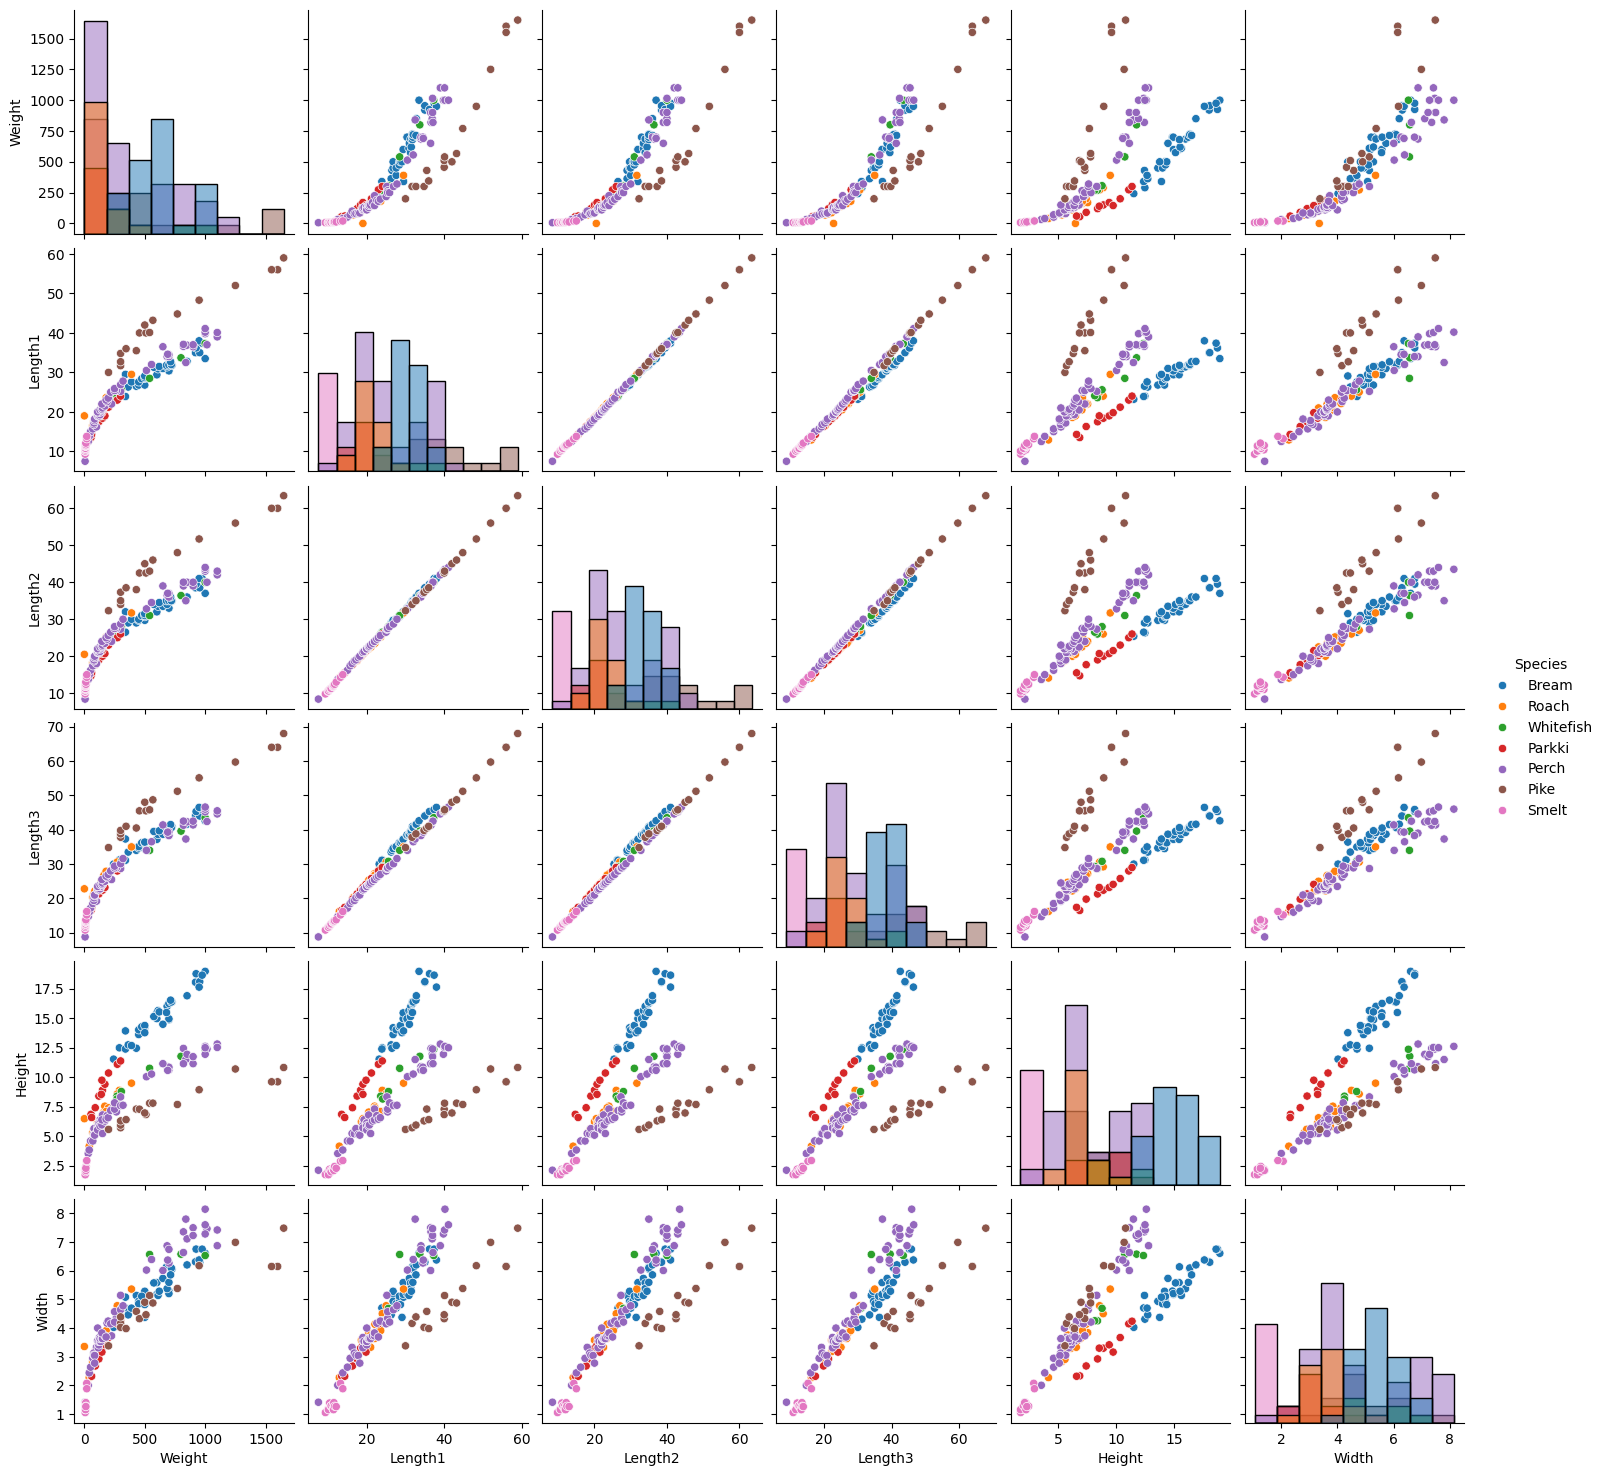

In [125]:
sns.pairplot(fish, hue='Species', diag_kind='hist')

<Axes: xlabel='Weight', ylabel='Prediction'>

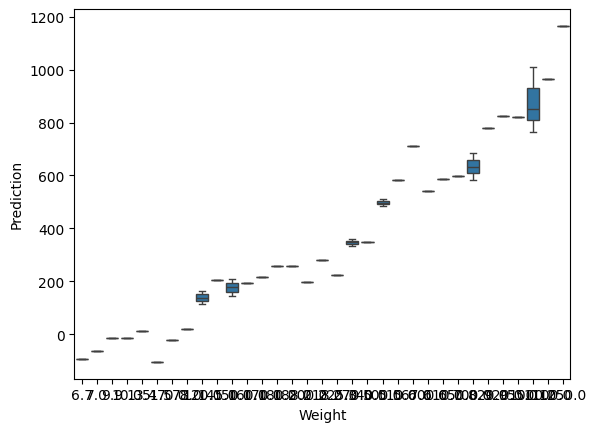

In [126]:
sns.boxplot(x='Weight', y='Prediction', data=result)